['../cpp/output/P3ud145.dat', '../cpp/output/P3uds145.dat', '../cpp/output/P3udsc145.dat', '../cpp/output/P3udscb145.dat', '../cpp/output/P3udscbt145.dat', '../cpp/output/P3ud175.dat', '../cpp/output/P3uds175.dat', '../cpp/output/P3udsc175.dat', '../cpp/output/P3udscb175.dat', '../cpp/output/P3udscbt175.dat']
../cpp/output/P3ud145.dat || Color:  b || Graph: [, 0 ]
../cpp/output/P3uds145.dat || Color:  g || Graph: [, 0 ]
../cpp/output/P3udsc145.dat || Color:  c || Graph: [, 0 ]
../cpp/output/P3udscb145.dat || Color:  r || Graph: [, 0 ]
../cpp/output/P3udscbt145.dat || Color:  m || Graph: [, 0 ]
../cpp/output/P3ud175.dat || Color:  b || Graph: [, 1 ]
../cpp/output/P3uds175.dat || Color:  g || Graph: [, 1 ]
../cpp/output/P3udsc175.dat || Color:  c || Graph: [, 1 ]
../cpp/output/P3udscb175.dat || Color:  r || Graph: [, 1 ]
../cpp/output/P3udscbt175.dat || Color:  m || Graph: [, 1 ]


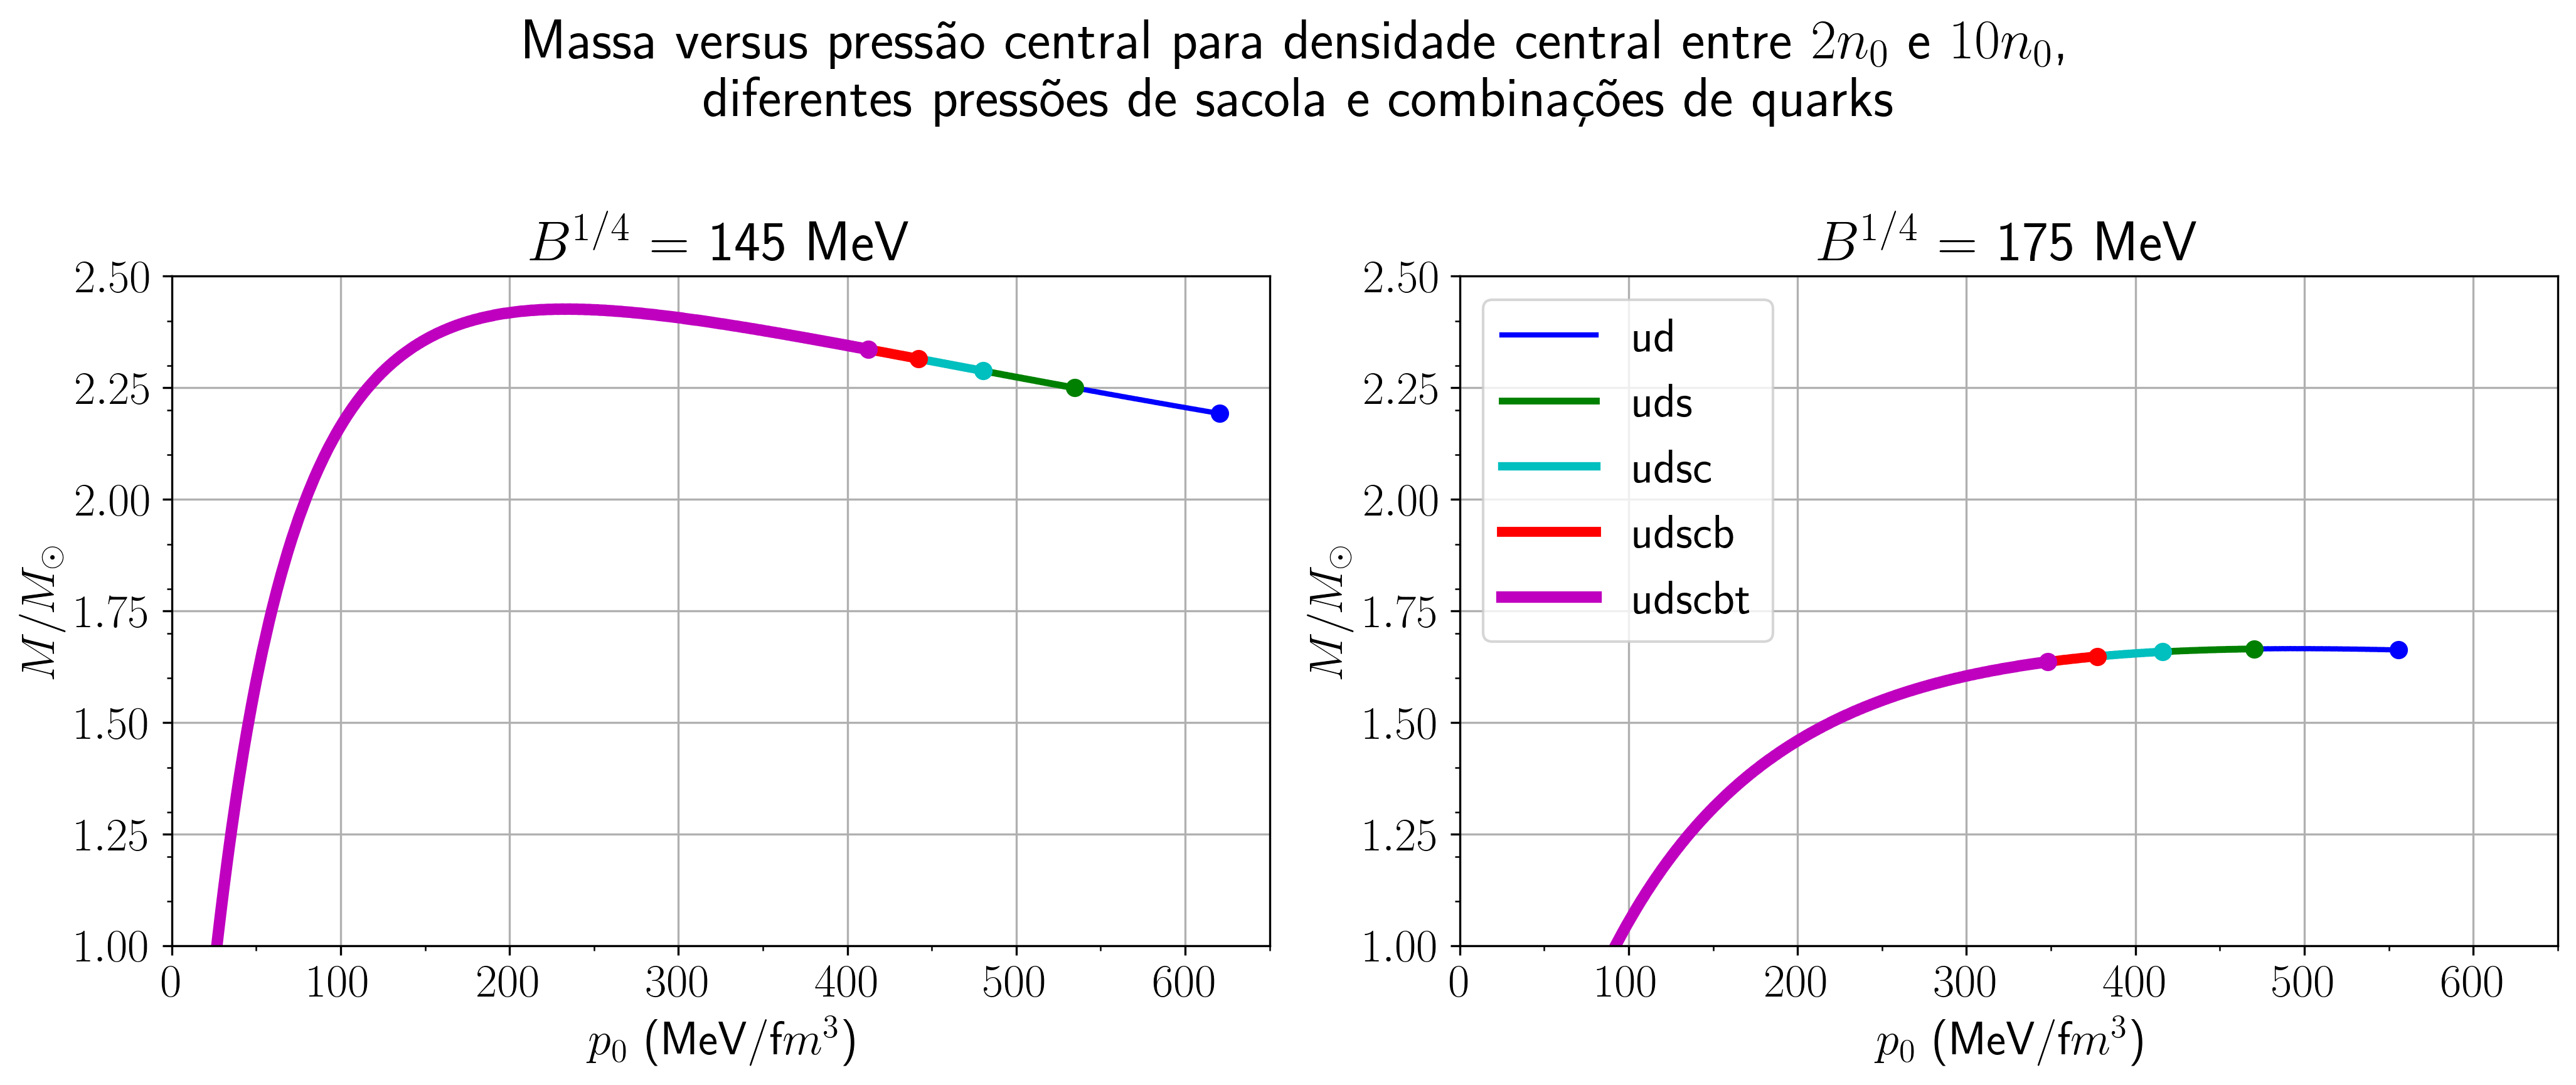

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams['figure.dpi'] = 300

fig, ax1 = plt.subplots(1,2)
#-------------------------------------------------------
bagPressures = []
bagPressures.append(145)
#bagPressures.append(155)
#bagPressures.append(165)
bagPressures.append(175)
titles = []
titles.append('ud')
titles.append('uds')
titles.append('udsc')
titles.append('udscb')
titles.append('udscbt')
dirs = []
for bP in bagPressures:
    for i in titles:
        dirs.append('../cpp/output/P3' + i + str(bP) +'.dat')
print(dirs)
cols = []
cols.append('b')
cols.append('g')
cols.append('c')
cols.append('r')
cols.append('m')

for k in range(2):
    x = []
    ax1[k].set_title("$B^{1/4}$ = " + str(bagPressures[k]) + " MeV")
    ax1[k].set_xlabel(r'$p_0$ (MeV/f$m^3$)')
    ax1[k].set_ylabel(r'$M/M_\odot$')
    ax1[k].set_xlim([0, 650])
    #ax1[k].xaxis.set_major_locator(MultipleLocator(2))
    ax1[k].xaxis.set_minor_locator(MultipleLocator(50))
    #ax1[k].yaxis.set_major_locator(MultipleLocator(2))
    ax1[k].yaxis.set_minor_locator(MultipleLocator(0.1))
    ax1[k].set_ylim([1,2.5])
        
    for i in range(len(titles)):
        x.append([])
        with open(dirs[i+k*5], 'r') as f:   
                
            lines = f.readlines()
            x[i].append([float(line.split()[0]) for line in lines])
            x[i].append([float(line.split()[1]) for line in lines])
            x[i].append([float(line.split()[2]) for line in lines])

            ax1[k].grid(True)
            #ax1[k].plot(x[i][1],x[i][2], cols[i], label=titles[i])
            ax1[k].plot(x[i][1],x[i][2], cols[i], label=str(titles[i]), linewidth = (0.6*i)+2)
            ax1[k].plot(x[i][1][-1],x[i][2][-1], 'o', color=cols[i])
            print(dirs[i+k*5], "|| Color: ", cols[i], "|| Graph: [,",k,"]")
        
ax1[1].legend(loc='upper left')    
fig.suptitle("Massa versus pressão central para densidade central entre $2n_0$ e $10n_0$, \ndiferentes pressões de sacola e combinações de quarks ")
fig.tight_layout(pad=1.25)
plt.show()